<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module2%20lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

Lab 1: Basic Plots

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [6]:
X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

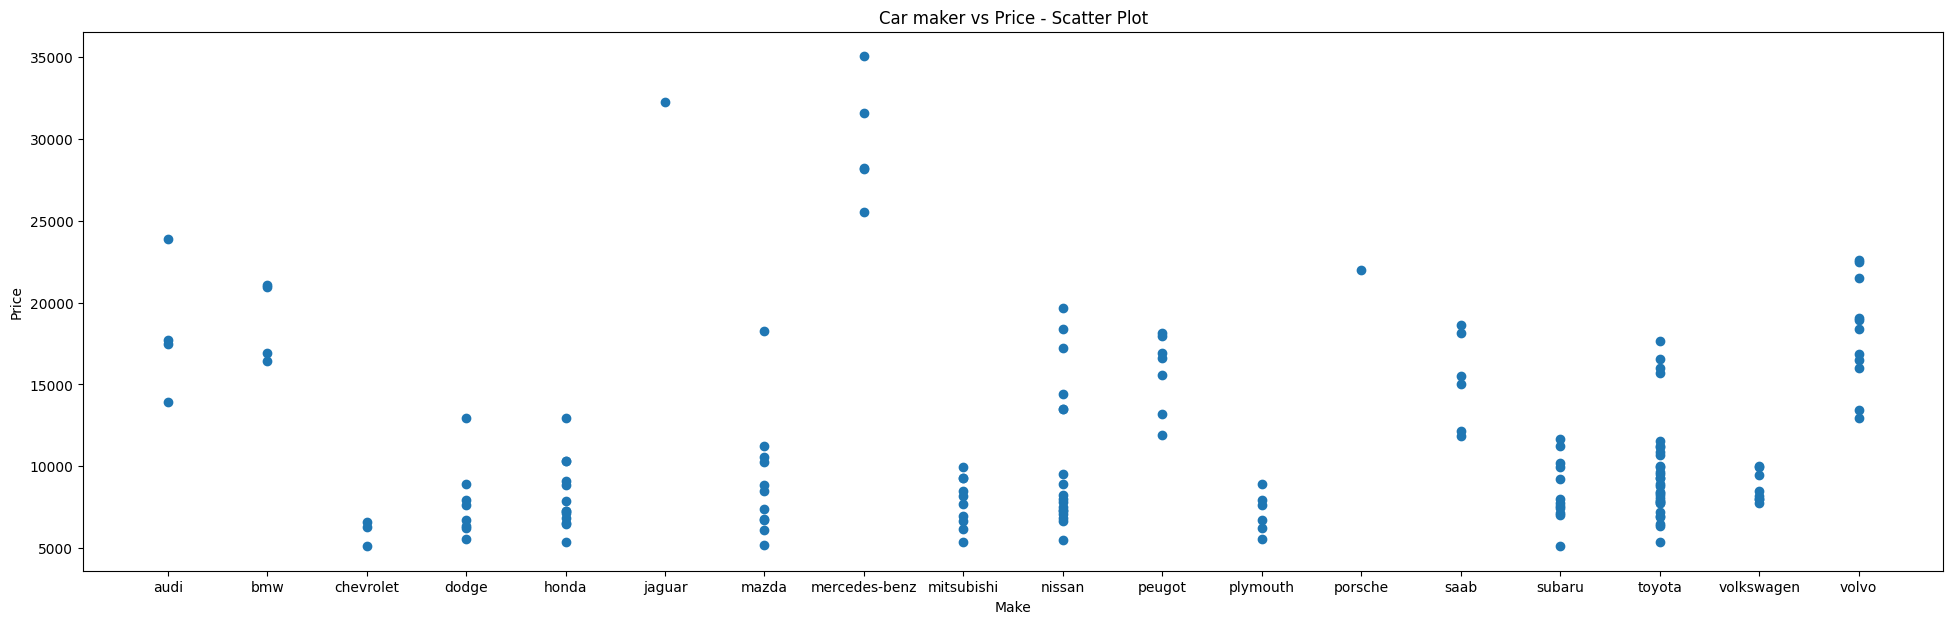

In [7]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

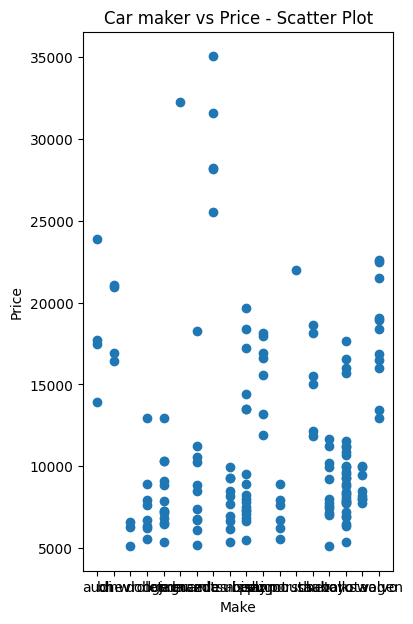

In [8]:
plt.figure(figsize = (4, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

<ipython-input-9-0447ba8df549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

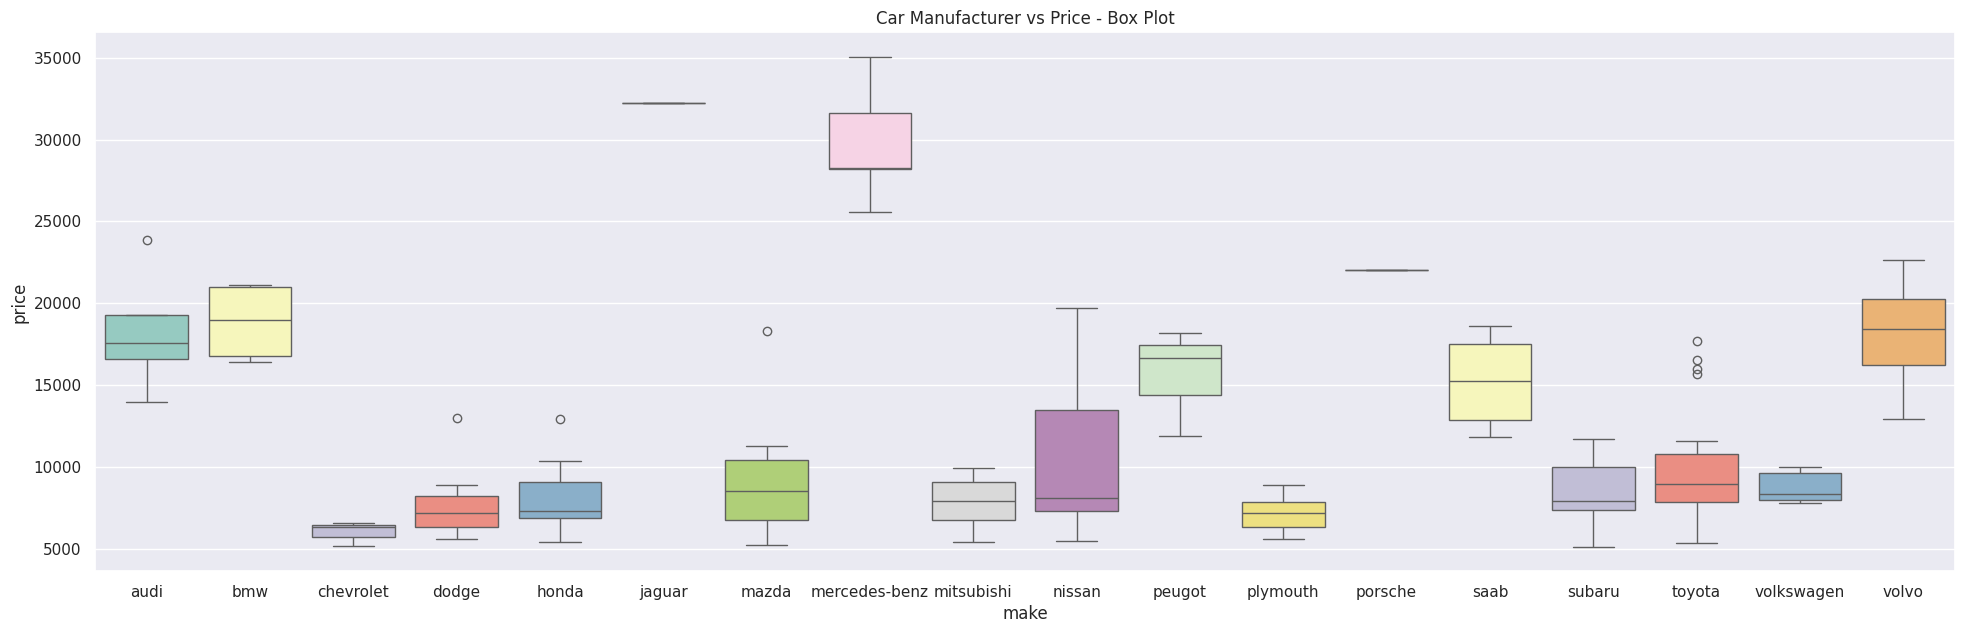

In [9]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

**Violin Plot**

<ipython-input-10-10344be32235>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')


Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

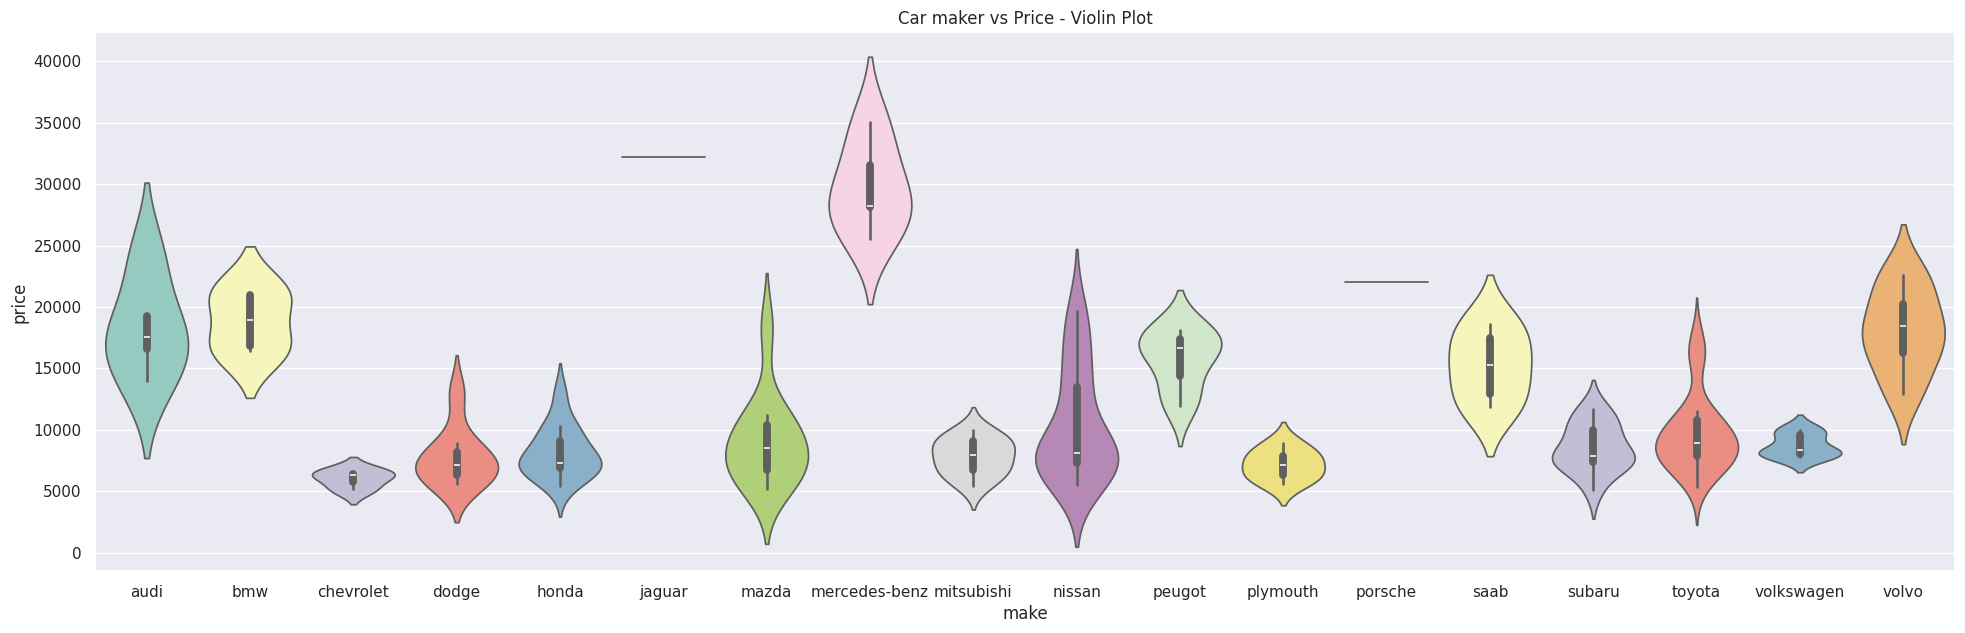

In [10]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

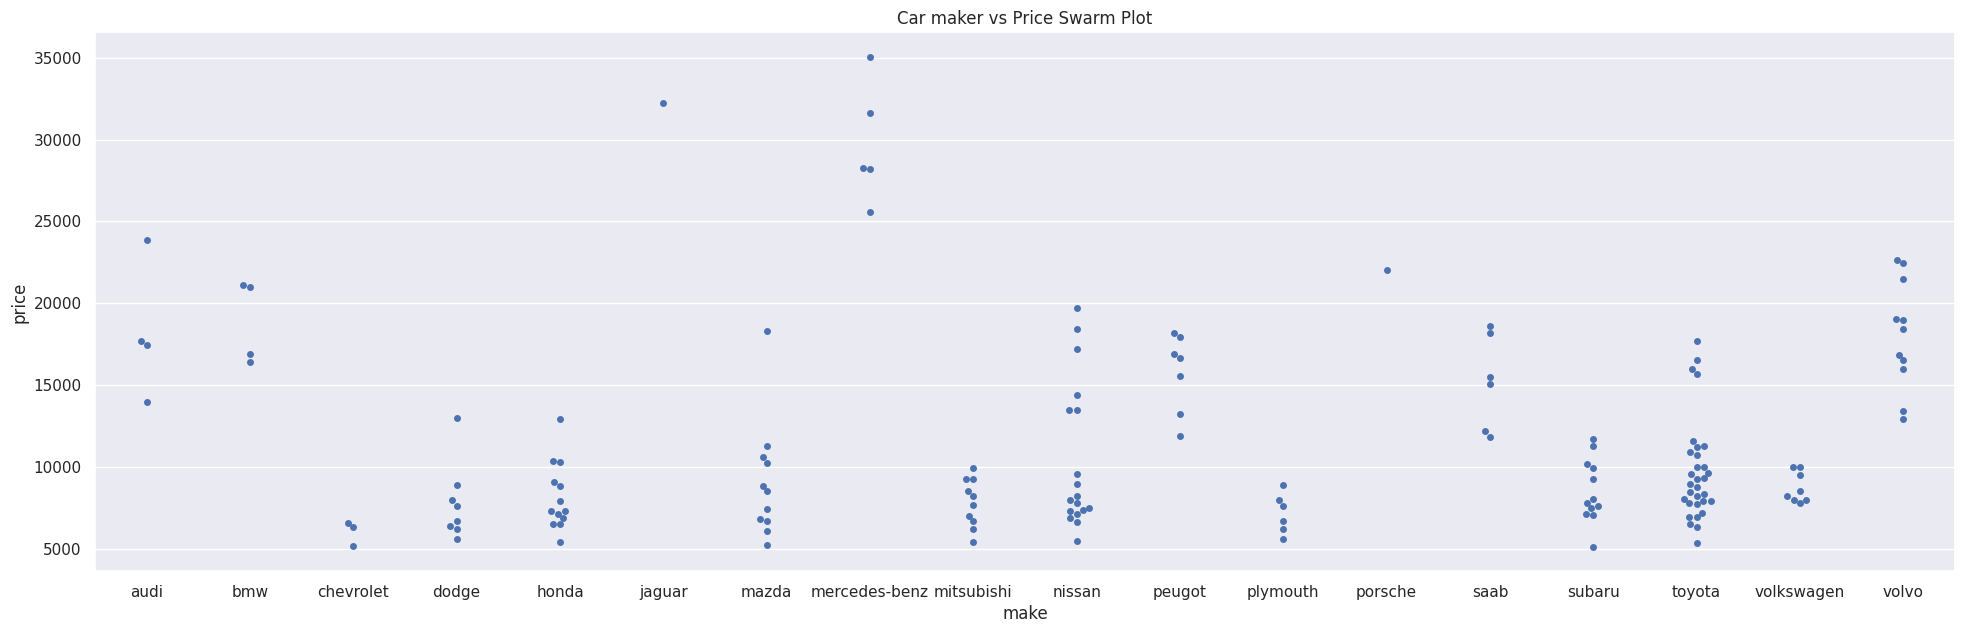

In [11]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

<ipython-input-12-c71fe76854fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')


Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

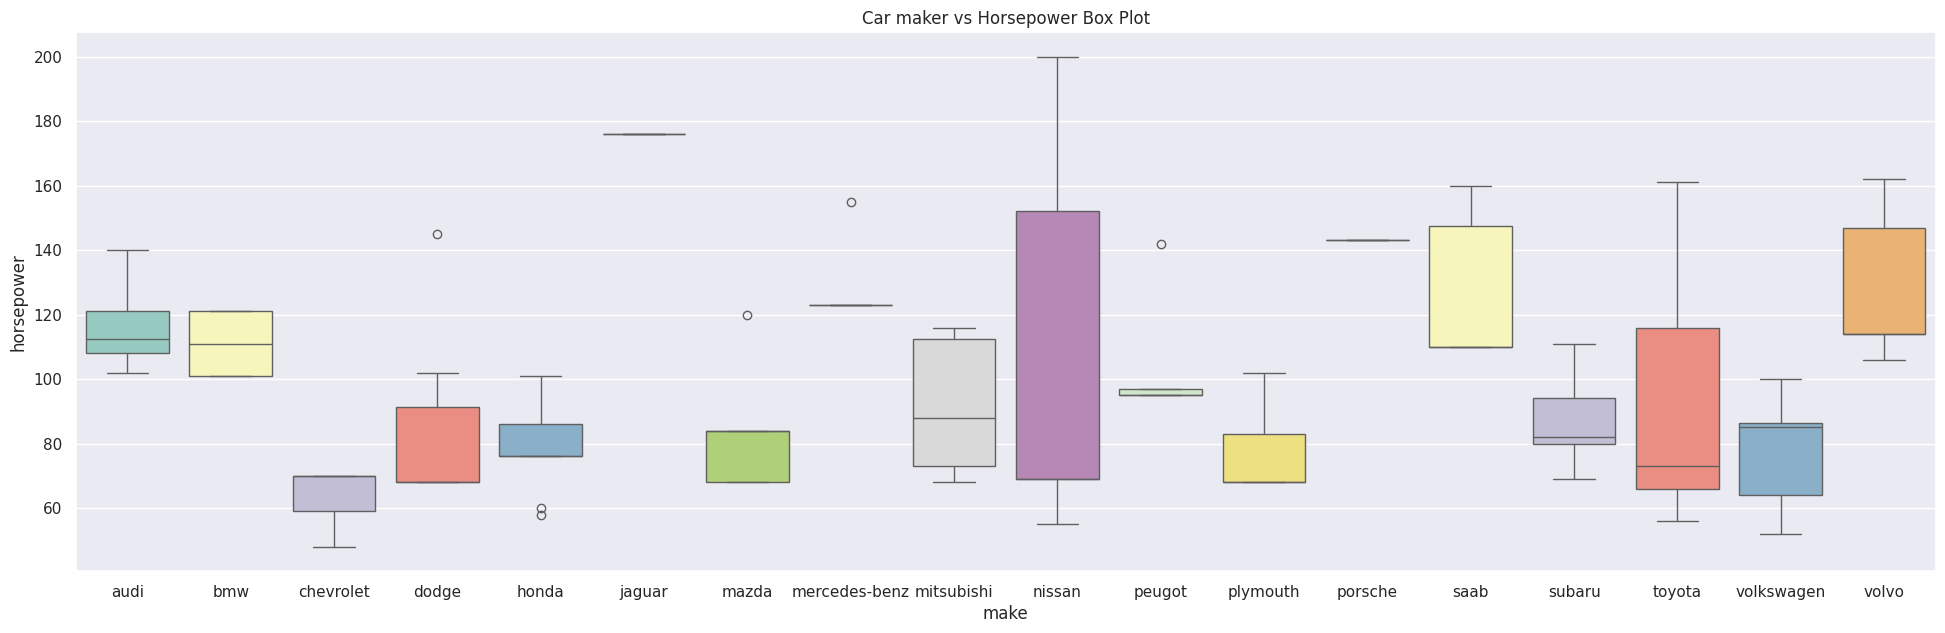

In [12]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

<Axes: xlabel='horsepower', ylabel='price'>

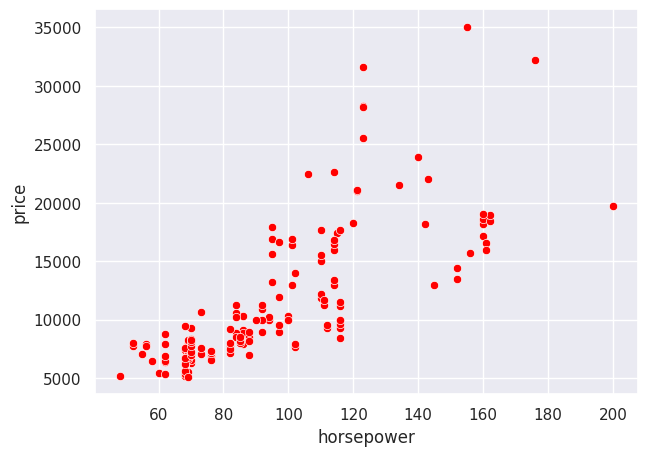

In [13]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

<Axes: xlabel='horsepower', ylabel='price'>

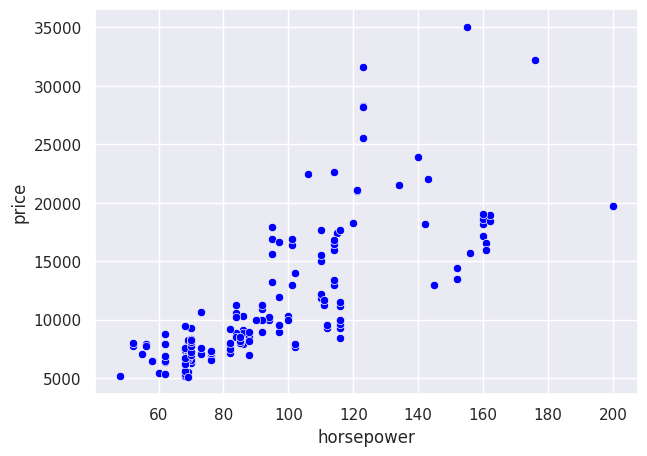

In [14]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "blue")

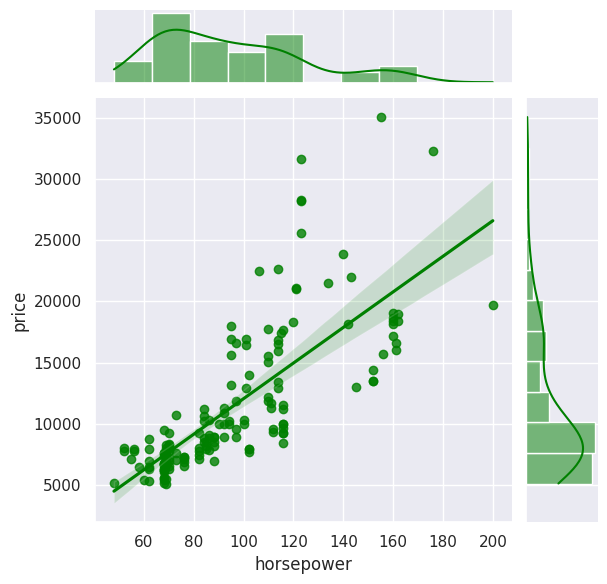

In [15]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

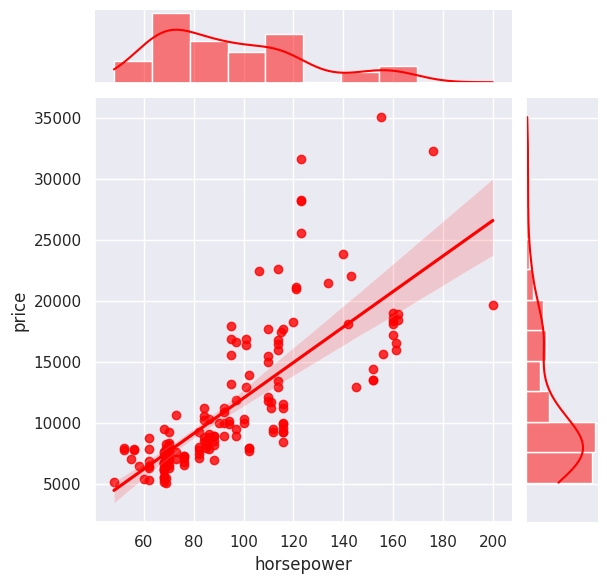

In [16]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'red')

**Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".**

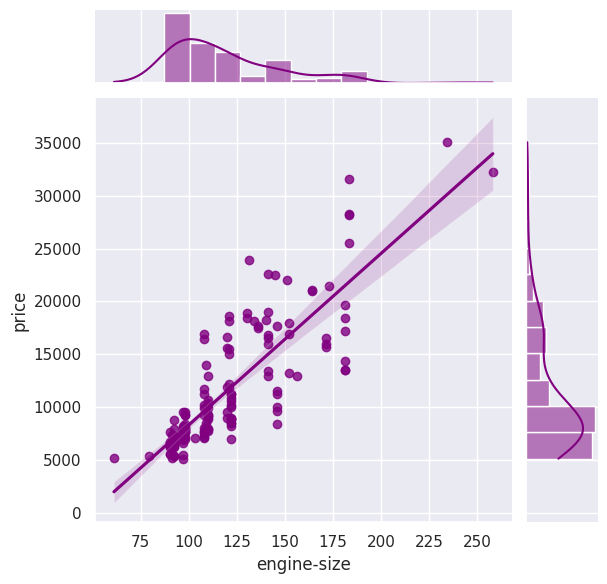

In [17]:
feature = "engine-size"

sns.jointplot(x=pd.to_numeric(X[feature]), y=y, kind="reg", color='purple')

**Question: **

1. Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

The "convertible" body-style has the highest maximum price, indicating it is the "costliest" body-type.
The "convertible" body-style also has the highest minimum price, suggesting even the lowest-priced convertibles are more expensive than other body-styles.
The "convertible" body-style has the widest price range and largest interquartile range, indicating greater variability in prices within this category.

2. Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

The maximum and minimum values alone are not a clear indication of the "costliest" body-type. Considering the interquartile range (IQR) provides more comprehensive information. The "convertible" body-style has the largest IQR, suggesting a broader range of prices, from lower-end to higher-end models. Analyzing the IQR gives better insight into the typical price distributions across body-types, beyond just the highest maximum price.

3. Do you think the body-style of a car can be a good predictor for its price?



Yes, the body-style of a car can be a good predictor of its price. The plot shows clear differences in price distributions across body-style categories, with the "convertible" body-style having the highest prices overall. This indicates that the body-style is a relevant factor in determining a car's price. However, other vehicle characteristics, such as engine size and features, also play a significant role in pricing.


<ipython-input-18-5739ed01973b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')


Text(0.5, 1.0, 'Body style vs Price Box Plot')

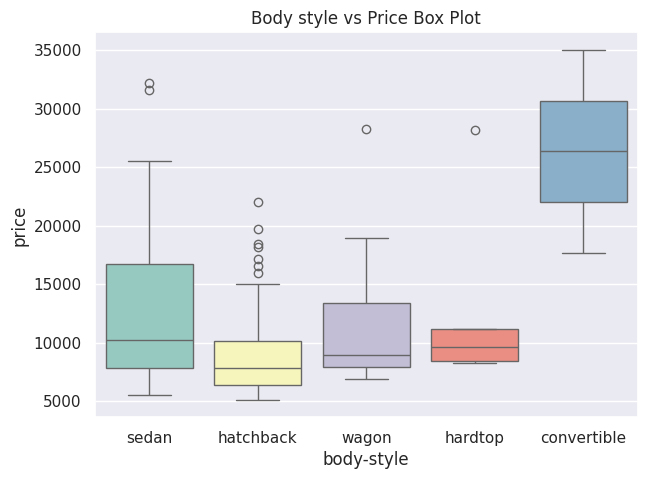

In [18]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

**Exercise**

1. Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.

2.Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

KeyError: 'feature1'

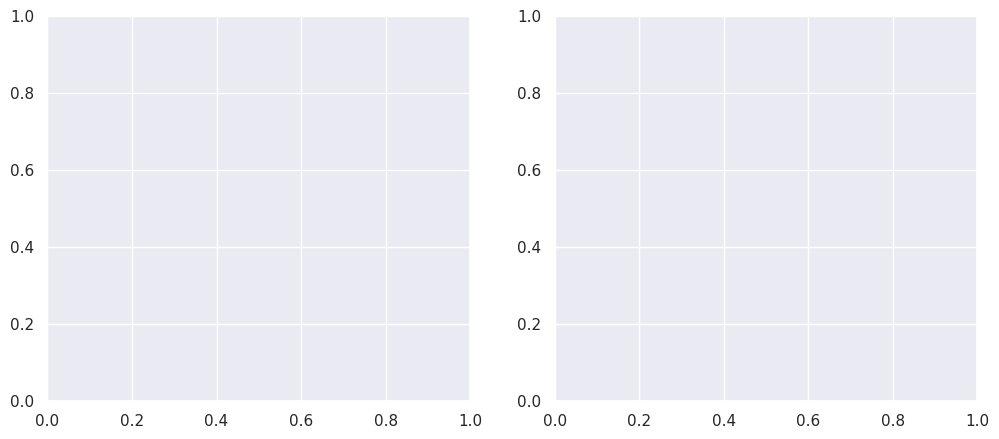

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X['feature1'], y)
ax1.set_title('Scatter Plot')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Target Variable')
sns.boxplot(x='body-style', y='price', data=X, ax=ax2)
ax2.set_title('Box Plot')
ax2.set_xlabel('Body Style')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()


Column 'feature1' not found in the DataFrame.
Columns 'body-style' or 'price' not found in the DataFrame.


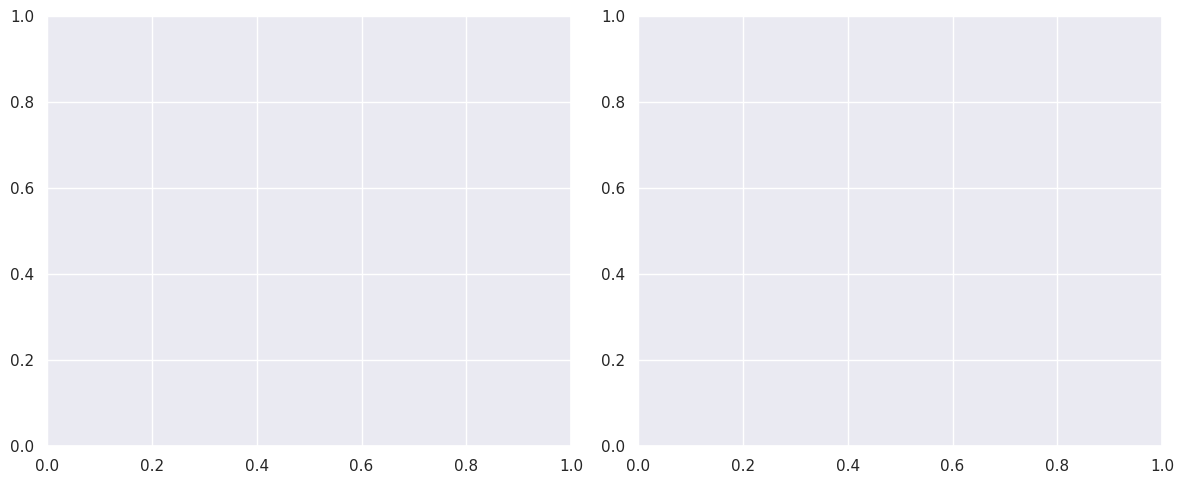

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

if 'feature1' in X.columns:
    ax1.scatter(X['feature1'], y)
    ax1.set_title('Scatter Plot')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Target Variable')
else:
    print("Column 'feature1' not found in the DataFrame.")

if 'body-style' in X.columns and 'price' in X.columns:
    sns.boxplot(x='body-style', y='price', data=X, ax=ax2)
    ax2.set_title('Box Plot')
    ax2.set_xlabel('Body Style')
    ax2.set_ylabel('Price')
else:
    print("Columns 'body-style' or 'price' not found in the DataFrame.")

plt.tight_layout()
plt.show()
